In [1]:
import os
import pandas as pd

# Define the path to the STA file
folder_path = "E:/Tracy/fall 2023/STA 160/Nepal/Nepal 2022/NP_2022_DHS_11092023_2251_202866/NPHR82DT"
file_name = "NPHR82FL.DTA"
sta_file_path = os.path.join(folder_path, file_name)

# Check if the file exists
if os.path.exists(sta_file_path):
    # Read the STA file into a pandas DataFrame
    df = pd.read_stata(sta_file_path)

    # Display information about the DataFrame
    print("DataFrame Info:")
    print(df.info())

    # Display the DataFrame
    print("\nContents of the STA file:")
    print(df)
else:
    print(f"The file {file_name} does not exist in the specified folder.")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13786 entries, 0 to 13785
Columns: 3027 entries, hhid to hai13z_5
dtypes: category(2659), float64(319), int16(13), int32(4), int8(15), object(17)
memory usage: 73.2+ MB
None

Contents of the STA file:
               hhid hv000  hv001  hv002 hv003  hv004   hv005  hv006  hv007  \
0             1   1   NP8      1      1     1      1  934601   magh   2078   
1             1   6   NP8      1      6     1      1  934601   magh   2078   
2             1   8   NP8      1      8     1      1  934601   magh   2078   
3             1   9   NP8      1      9     2      1  934601   magh   2078   
4             1  11   NP8      1     11     4      1  934601   magh   2078   
...             ...   ...    ...    ...   ...    ...     ...    ...    ...   
13781       476 132   NP8    476    132     1    476  481982  poush   2078   
13782       476 137   NP8    476    137     1    476  481982  poush   2078   
13783       476 142   NP8    47

In [2]:
df["hv009"]
df["hv216"]

df["RoomProp"] = df["hv009"]/df["hv216"]
df["RoomProp"]

C:\Users\20463\AppData\Local\Temp\ipykernel_10636\2189203839.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["RoomProp"] = df["hv009"]/df["hv216"]


0        3.500000
1        2.000000
2        3.500000
3        3.000000
4        2.000000
           ...   
13781    2.500000
13782    1.000000
13783    1.333333
13784    2.000000
13785    4.500000
Name: RoomProp, Length: 13786, dtype: float64

In [3]:
df['RoomProp'].describe()

count    13786.000000
mean         2.113809
std          1.197853
min          0.090909
25%          1.333333
50%          2.000000
75%          2.500000
max         10.500000
Name: RoomProp, dtype: float64

In [4]:
df["hv009"]
# Assuming df is your DataFrame
value_counts = df['hv009'].value_counts()
#print("Count of 'no' and 'yes' values:")
print(value_counts)

hv009
4     2934
3     2669
5     2251
2     2180
6     1355
1      826
7      720
8      369
9      219
10     121
11      56
12      34
13      24
14       9
15       6
16       5
18       2
17       2
21       1
20       1
26       1
22       1
Name: count, dtype: int64


In [17]:
#HFS_MOD:Moderate or severe food insecurity probability
print("Basic Info:")
print(df['hfs_mod'].info())

print("\nUnique Values and Counts:")
print(df['hfs_mod'].value_counts())

print("\nNumber of Missing Values:")
print(df['hfs_mod'].isnull().sum())

print("\nDescriptive Statistics:")
print(df['hfs_mod'].describe())


Basic Info:
<class 'pandas.core.series.Series'>
RangeIndex: 13786 entries, 0 to 13785
Series name: hfs_mod
Non-Null Count  Dtype  
--------------  -----  
13744 non-null  float64
dtypes: float64(1)
memory usage: 107.8 KB
None

Unique Values and Counts:
hfs_mod
0.0           7740
986229.0      1953
35698168.0    1272
7608985.0     1172
74705556.0     587
95483636.0     331
99467046.0     248
99903237.0     231
99920655.0     210
Name: count, dtype: int64

Number of Missing Values:
42

Descriptive Statistics:
count    1.374400e+04
mean     1.458367e+07
std      2.944739e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.608985e+06
max      9.992066e+07
Name: hfs_mod, dtype: float64


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Remove infinite values and NaN values
df_clean = df.dropna(subset=['RoomProp', 'hfs_mod'])  # Drops rows where either column is NaN
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['RoomProp', 'hfs_mod'])  # Replaces inf with NaN and then drops

# Calculate pearson_corr, pearson_p_value = pearsonr(df_clean['RoomProp'], df_clean['hfs_mod'])
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Pearson p-value: {pearson_p_value}")

spearman_corr, spearman_p_value = spearmanr(df_clean['RoomProp'], df_clean['hfs_mod'])
print(f"Spearman rank correlation: {spearman_corr}")
print(f"Spearman p-value: {spearman_p_value}")

Pearson correlation coefficient: 0.1744168815007958
Pearson p-value: 2.527688919378767e-94
Spearman rank correlation: 0.18261863575132706
Spearman p-value: 2.274277003575364e-103


In [14]:
# Correlation after removing NAs
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Calculate IQR for 'RoomProp'
Q1 = df['RoomProp'].quantile(0.25)
Q3 = df['RoomProp'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['RoomProp'] >= lower_bound) & (df['RoomProp'] <= upper_bound)]

# Remove any remaining infinite values or NaN values after removing outliers
df_no_outliers = df_no_outliers.dropna(subset=['RoomProp', 'hfs_mod'])
df_no_outliers = df_no_outliers.replace([np.inf, -np.inf], np.nan).dropna(subset=['RoomProp', 'hfs_mod'])

# Now calculate Pearson and Spearman correlations without the outliers
pearson_corr_no_outliers, pearson_p_value_no_outliers = pearsonr(df_no_outliers['RoomProp'], df_no_outliers['hfs_mod'])
spearman_corr_no_outliers, spearman_p_value_no_outliers = spearmanr(df_no_outliers['RoomProp'], df_no_outliers['hfs_mod'])

pearson_corr_no_outliers, pearson_p_value_no_outliers, spearman_corr_no_outliers, spearman_p_value_no_outliers

(0.13656592067286796,
 2.2137845213332884e-55,
 0.15261905047769433,
 7.194893725104997e-69)

In [29]:
#HFS1:Household worried about food for lack of money
print("Basic Info:")
print(df['hfs1'].info())

print("\nUnique Values and Counts:")
print(df['hfs1'].value_counts())

print("\nNumber of Missing Values:")
print(df['hfs1'].isnull().sum())

print("\nDescriptive Statistics:")
print(df['hfs1'].describe())

# If 'hfs1' is categorical
if df['hfs1'].dtype.name == 'category':
    print("\nCategory Descriptions:")
    print(df['hfs1'].cat.categories)
    print("\nCategory Codes:")
    print(df['hfs1'].cat.codes)

Basic Info:
<class 'pandas.core.series.Series'>
RangeIndex: 13786 entries, 0 to 13785
Series name: hfs1
Non-Null Count  Dtype   
--------------  -----   
13784 non-null  category
dtypes: category(1)
memory usage: 13.8 KB
None

Unique Values and Counts:
hfs1
no     8584
yes    5200
7         0
8         0
Name: count, dtype: int64

Number of Missing Values:
2

Descriptive Statistics:
count     13784
unique        2
top          no
freq       8584
Name: hfs1, dtype: object

Category Descriptions:
Index(['no', 'yes', '7', '8'], dtype='object')

Category Codes:
0        0
1        1
2        1
3        0
4        0
        ..
13781    0
13782    1
13783    1
13784    0
13785    1
Length: 13786, dtype: int8


In [49]:
# Ensure that 'hfs1' is read as a categorical variable with the appropriate categories
df['hfs1'] = df['hfs1'].astype('category')
df['hfs1'] = df['hfs1'].cat.set_categories(['no', 'yes', '7', '8'])
# Filter out the responses 'Refused to answer' (7) and 'Don't know' (8)
df_filtered = df[df['hfs1'].isin(['no', 'yes'])]

# Convert 'no' and 'yes' to 0 and 1 respectively for correlation calculation
df_filtered['hfs1'] = df_filtered['hfs1'].map({'no': 0, 'yes': 1})

# Calculate the Spearman rank correlation
spearman_corr_hfs1 = df_filtered['RoomProp'].corr(df_filtered['hfs1'], method='spearman')

# Output the Spearman rank correlation
print(f"Spearman rank correlation between 'hfs1' and 'RoomProp': {spearman_corr_hfs1}")
from scipy.stats import ttest_ind

# Filter the DataFrame to exclude any '7' and '8' categories if they are present
df_filtered = df[df['hfs1'].isin(['no', 'yes'])]

# Perform t-test
group_no = df_filtered[df_filtered['hfs1'] == 'no']['RoomProp']
group_yes = df_filtered[df_filtered['hfs1'] == 'yes']['RoomProp']
t_stat, p_val = ttest_ind(group_no, group_yes)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

Spearman rank correlation between 'hfs1' and 'RoomProp': 0.15896654646962416
t-statistic: -20.166002614713733, p-value: 3.746029893552661e-89


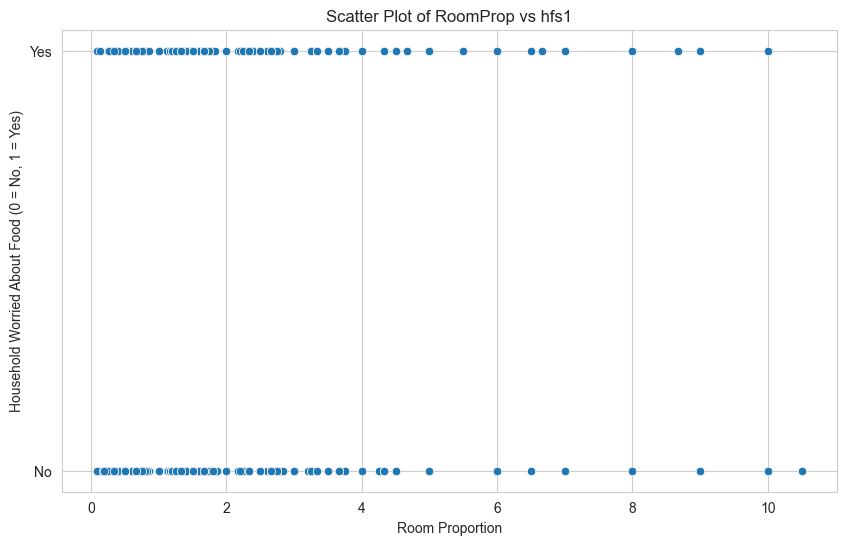

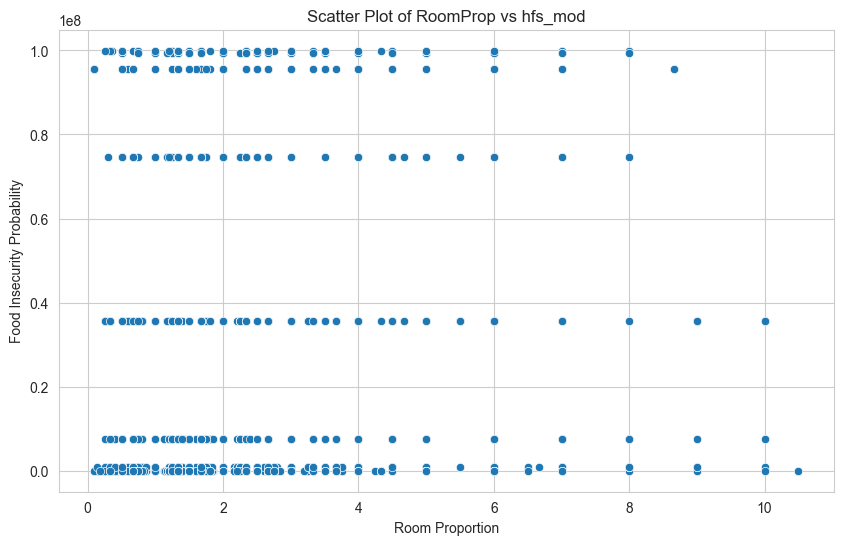

In [47]:
# Scatter plots
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'no' and 'yes' to 0 and 1 for better visualization
df['hfs1_binary'] = df['hfs1'].map({'no': 0, 'yes': 1})
# Plot for RoomProp vs hfs1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RoomProp', y='hfs1_binary', data=df)
plt.title('Scatter Plot of RoomProp vs hfs1')
plt.xlabel('Room Proportion')
plt.ylabel('Household Worried About Food (0 = No, 1 = Yes)')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

# Plot for RoomProp vs hfs_mod
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RoomProp', y='hfs_mod', data=df)
plt.title('Scatter Plot of RoomProp vs hfs_mod')
plt.xlabel('Room Proportion')
plt.ylabel('Food Insecurity Probability')
plt.show()

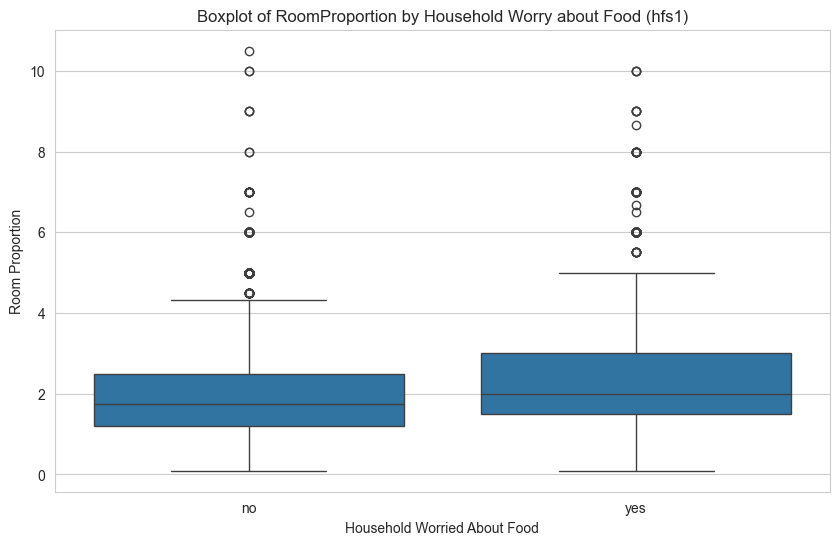

In [48]:
# Boxplot for RoomProp vs hfs1
df_filtered['hfs1'] = df_filtered['hfs1'].cat.remove_categories(['7', '8'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='hfs1', y='RoomProp', data=df_filtered)
plt.title('Boxplot of RoomProportion by Household Worry about Food (hfs1)')
plt.xlabel('Household Worried About Food')
plt.ylabel('Room Proportion')
plt.show()